<a href="https://colab.research.google.com/github/joseluisnaranjo/jolunavi/blob/master/Revision_20201004_QuiasiPhaseEquilibrium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **Fast Prediction of the Quasi-phase Equilibrium of Alloys**



 **Improving** the fast prediction of the quasi phase equilibrum in phase field model for multicomponet alloys. 

Here in we aim to improve the phase field model for multicomponent alloys introduced by **Xue Jiang** et al., In the paper is provide the dataset used to obtain their simulation, for this model we will use the same dataset in order to determine if the proposed Neural Network Model (NN) can improve the eficiency and decrease the error rate when predicting the solutions of the quasi phase equilibrium equiation for the same alloy of the original paper. 

As a forst step, we are going to load the data, we can do it as following: 

**From a local Drive:**

In [ ]:
#Google library that prompts a file explorer
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#Library to read from a text file
from numpy import genfromtxt

#Read the files stating the separation option and asigning them to  variables
my_training_data = genfromtxt('Data100kTraining.csv', delimiter=',')
my_test_data = genfromtxt('Data1kTesting.csv', delimiter=',')

**From Google drive:**

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/Data')

Mounted at /content/Data


In [ ]:
#Library to read from a text file
from numpy import genfromtxt

#Read the files stating the separation option and asigning them to  variables
my_training_data = genfromtxt('/content/Data/My Drive/Wind Prediction/Data10kTraining.csv', delimiter=',') 
my_test_data = genfromtxt('/content/Data/My Drive/Wind Prediction/Data1kTesting.csv', delimiter=',')

In [ ]:
#Filter the needed rows from the datafile,  input data(CMg, CCu, Fhi); output data (MgL, MgS, CuL, CuS)
training_inputdata = my_training_data[1:,0:3]
training_outputdata = my_training_data[1:,3:7]
#print (training_outputdata)

In [ ]:
#Filter the needed rows from the datafile,  input data(CMg, CCu, Fhi); output data (MgL, MgS, CuL, CuS)
test_inputdata = my_test_data[1:,0:3]
test_outputdata = my_test_data[1:,3:7]
#print (training_outputdata)

In [ ]:
#Only run this line if your model will predict one output. Set the second parameter as 3:MgL, 4:MgS. 5:CuL, 6:CuS
training_outputdataMgL = my_training_data[1:,3]
training_outputdataMgS = my_training_data[1:,4]
training_outputdataCuL = my_training_data[1:,5]
training_outputdataCuS = my_training_data[1:,6]

In [ ]:
#Only run this line if your model will predict one output. Set the second parameter as 3:MgL, 4:MgS. 5:CuL, 6:CuS
test_outputdataMgL = my_test_data[1:,3]
test_outputdataMgS = my_test_data[1:,4]
test_outputdataCuL = my_test_data[1:,5]
test_outputdataCuS = my_test_data[1:,6]


In [ ]:
import numpy as np
from numpy import  newaxis

training_input = training_inputdata[:,:,newaxis]
L_out_train =len(training_inputdata)
training_output = training_outputdata.reshape(L_out_train,4)
training_outputMgL = training_outputdataMgL.reshape(L_out_train,1)
training_outputMgS = training_outputdataMgS.reshape(L_out_train,1)
training_outputCuL = training_outputdataCuL.reshape(L_out_train,1)
training_outputCuS = training_outputdataCuS.reshape(L_out_train,1)
test_input = test_inputdata[:,:,newaxis]
L_out_test = len(test_inputdata)
test_output = test_outputdata.reshape(L_out_test,4)
test_outputMgL = test_outputdataMgL.reshape(L_out_test,1)
test_outputMgS = test_outputdataMgS.reshape(L_out_test,1)
test_outputCuL = test_outputdataCuL.reshape(L_out_test,1)
test_outputCuS = test_outputdataCuS.reshape(L_out_test,1)
print (training_input.shape)
print (training_output.shape)
print (test_input.shape)
print (test_output.shape)

(10000, 3, 1)
(10000, 4)
(1000, 3, 1)
(1000, 4)



Let's start with our import of TensorFlow

In [ ]:
#Only run this cell if you want to import an older version of tensorflow
%tensorflow_version 1.x

In [ ]:
#Importing the tensorflow's last Version package for defoult (if the last sentence was not run)
import tensorflow as tf
print(tf.__version__)

2.3.0


Notice that all of the values in the number are already between 0 and 1. If we are training a neural network, for various reasons it's easier if we treat all values in this range, a process called **normalization**'...and fortunately in Python it's easy to normalize a list like this without looping. 

Let's now design the model. In our design we will be playing with the number of layers and the number of newrons that will have each one, however the inicial values will be taking from a teoretical analisys that will be shown in a separe file in the GitHub directory.

Remenber,  the following model has as input: CMg CCu y Fhi; and as outputs: MgL, MgS, CuL, CuS. However, the prediction will be done by separated proceses, this one in particular was designed to predict the solution for MgL

In [ ]:
modelMgL = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])
modelMgS = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])
modelCuL = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])
modelCuS = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(16, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.tanh)])

The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

**Stochastic Gradien Descent**

In [ ]:
#Here,we get a functional model for each output variable, which can be tunned as needed that will be ready to accept the input parameters 
modelMgL.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics=['accuracy'])
modelMgS.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics=['accuracy'])
modelCuL.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics=['accuracy'])
modelCuS.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics=['accuracy'])

In [ ]:
#We fit the data into  the models and get oru tranned model
historyMgL = modelMgL.fit(training_input, training_outputMgL, validation_data=(test_input, test_outputMgL), batch_size= 64, epochs=200, verbose=1)
historyMgS = modelMgS.fit(training_input, training_outputMgS, validation_data=(test_input, test_outputMgS), batch_size= 64, epochs=100, verbose=1)
historyCuL = modelCuS.fit(training_input, training_outputCuL, validation_data=(test_input, test_outputCuL), batch_size= 64, epochs=200, verbose=1)
historyCuS = modelCuL.fit(training_input, training_outputCuS, validation_data=(test_input, test_outputCuS), batch_size= 64, epochs=200, verbose=1)


Epoch 1/200
157/157 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 8.7481e-04 - val_accuracy: 0.0000e+00
Epoch 2/200
157/157 [==============================] - 0s 1ms/step - loss: 9.2292e-04 - accuracy: 0.0000e+00 - val_loss: 7.9772e-04 - val_accuracy: 0.0000e+00
Epoch 3/200
157/157 [==============================] - 0s 1ms/step - loss: 8.2981e-04 - accuracy: 0.0000e+00 - val_loss: 7.0541e-04 - val_accuracy: 0.0000e+00
Epoch 4/200
157/157 [==============================] - 0s 1ms/step - loss: 7.4228e-04 - accuracy: 0.0000e+00 - val_loss: 6.2666e-04 - val_accuracy: 0.0000e+00
Epoch 5/200
157/157 [==============================] - 0s 1ms/step - loss: 6.6987e-04 - accuracy: 0.0000e+00 - val_loss: 5.7874e-04 - val_accuracy: 0.0000e+00
Epoch 6/200
157/157 [==============================] - 0s 1ms/step - loss: 5.9244e-04 - accuracy: 0.0000e+00 - val_loss: 5.1036e-04 - val_accuracy: 0.0000e+00
Epoch 7/200
157/157 [=============================

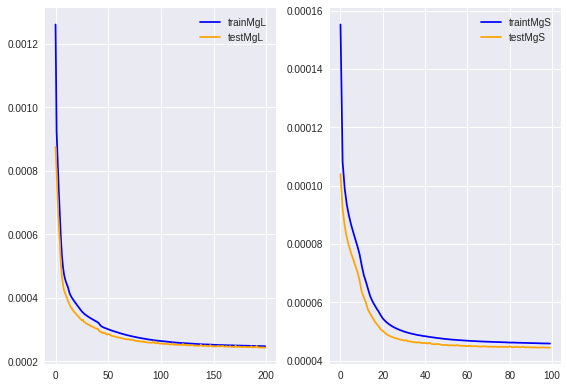

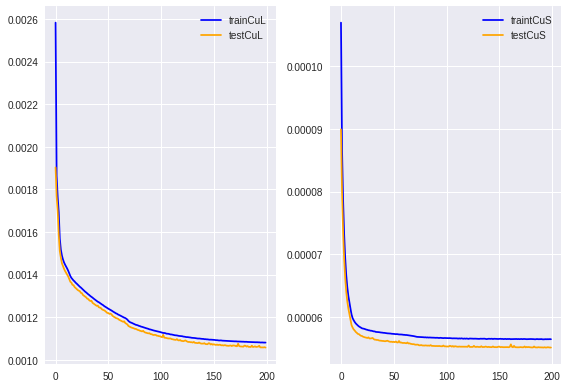

In [ ]:
#Following is a plot of the learning curve  
from matplotlib import pyplot as plt
plt.style.use('seaborn')

#fig1, ax1 = plt.subplots()
#fig2, ax2 = plt.subplots()
#fig3, ax3 = plt.subplots()
#fig4, ax4 = plt.subplots()

figMg ,(ax1, ax2)= plt.subplots(nrows=1, ncols=2)
ax1.plot(historyMgL.history['loss'], label='trainMgL', color ='blue')
ax1.plot(historyMgL.history['val_loss'], label='testMgL', color ='orange')
ax2.plot(historyMgS.history['loss'], label='traintMgS', color ='blue')
ax2.plot(historyMgS.history['val_loss'], label='testMgS', color ='orange')
plt.tight_layout()

figCu ,(ax3, ax4)= plt.subplots(nrows=1, ncols=2)
ax3.plot(historyCuL.history['loss'], label='trainCuL', color ='blue')
ax3.plot(historyCuL.history['val_loss'], label='testCuL', color ='orange')
ax4.plot(historyCuS.history['loss'], label='traintCuS', color ='blue')
ax4.plot(historyCuS.history['val_loss'], label='testCuS', color ='orange')

ax1.legend()
#ax1.set_title('Loss / Sthocastic Gradiend Descent Optimizer')
#ax1.set_xlabel('Leyenda Y')
#ax1.set_ylabel('Leyenda X')

ax2.legend()
ax3.legend()
ax4.legend()

plt.tight_layout()

plt.show()


In [ ]:
#Evaluation of the errors and acuracy of the trained model
MgL_loss, MgL_accuracy = modelMgL.evaluate(test_input, test_outputMgL)
MgS_loss, MgS_accuracy = modelMgL.evaluate(test_input, test_outputMgS)
CuL_loss, CuL_accuracy = modelMgL.evaluate(test_input, test_outputCuL)
CuS_loss, CuS_accuracy = modelMgL.evaluate(test_input, test_outputCuS)

#preductions 
MgL_predictions = modelMgL.predict(test_input)
MgS_predictions = modelMgS.predict(test_input)
CuL_predictions = modelCuL.predict(test_input)
CuS_predictions = modelCuS.predict(test_input)

print("\n Following are the first 6 predicction and the expected value for the MgL output:")
print(MgL_predictions[0:6].reshape(1,6))
print(test_outputMgL[0:6].reshape(1,6))

32/32 [==============================] - 0s 936us/step - loss: 0.0030 - accuracy: 0.0000e+00

 Following are the first 6 predicction and the expected value for the MgL output:
[[0.04716969 0.04068322 0.1116811  0.10648225 0.06869247 0.0488019 ]]
[[0.05552293 0.02777021 0.06883758 0.07498071 0.08858769 0.04489938]]


Computation of the Mean Relative Error for each of the values predicted (individually)

In [ ]:

def relativeErrorCalcualtion(Y, Yhat):
  N = len(Y)
  error = np.sum(np.absolute((Yhat - Y)/Y))/N
  return error
    
MgL_rError =   relativeErrorCalcualtion(test_outputMgL, MgL_predictions) 
MgS_rError =   relativeErrorCalcualtion(test_outputMgS, MgS_predictions) 
CuL_rError =   relativeErrorCalcualtion(test_outputCuL, CuL_predictions) 
CuS_rError =   relativeErrorCalcualtion(test_outputCuS, CuS_predictions) 


print("The Mean Relative Erros for each of the predictions are the following:")
print ("MgL Errors is:" + str( MgL_rError))
print ("MgS Errors is:" + str( MgS_rError))
print ("CuL Errors is:" + str( CuL_rError))
print ("CuS Errors is:" + str( CuS_rError))



The Mean Relative Erros for each of the predictions are the following:
MgL Errors is:0.7647799969458154
MgS Errors is:0.8308139644964005
CuL Errors is:0.9803527914036899
CuS Errors is:47.834607031637276


**Conclution**

As can be seen, the implemneted NN have provide subtantially great improvement over the NN model presented in the original paper.